---

<h2> Thông số giá trị </h2>

---

In [65]:
import matplotlib.pyplot as plt
import time
import numpy as np
import pandas as pd
import random
from Genetic_Algorithm import * 
from tabulate import tabulate

Nhập số liệu tính toán:

In [66]:
items, max_capacity = get_user_input()
get_info()


Thông tin bài toán:

Vật phẩm 1: Weight = 4, Value = 2
Vật phẩm 2: Weight = 2, Value = 4
Vật phẩm 3: Weight = 5, Value = 6
Vật phẩm 4: Weight = 9, Value = 9
Vật phẩm 5: Weight = 10, Value = 7
Vật phẩm 6: Weight = 14, Value = 11
Vật phẩm 7: Weight = 16, Value = 12
Vật phẩm 8: Weight = 18, Value = 4
Vật phẩm 9: Weight = 13, Value = 8
Vật phẩm 10: Weight = 19, Value = 10
Vật phẩm 11: Weight = 4, Value = 2
Vật phẩm 12: Weight = 1, Value = 8
Vật phẩm 13: Weight = 3, Value = 12
Vật phẩm 14: Weight = 7, Value = 9

Maximum capacity = 40


<h3> Thay đổi hàm chọn lọc selection Roulette-wheel </h3>

In [67]:
fitness_history = []

In [68]:
def roulette_wheel_selection(population):
    total_fitness = sum(fitness(individual) for individual in population)
    probabilities = [fitness(individual) / total_fitness if total_fitness > 0 else 0 for individual in population]
    selected_population = []
    for _ in range(POPULATION_SIZE):
        rand = random.random()
        cumulative_probability = 0
        for i, probability in enumerate(probabilities):
            cumulative_probability += probability
            if rand <= cumulative_probability:
                selected_population.append(population[i])
                break
    return selected_population


<h3> Thay đổi hàm crossover Uniform </h3>

In [69]:
def uniform_crossover(parent1, parent2):
    child1, child2 = parent1[:], parent2[:]
    for i in range(len(parent1)):
        if random.random() < 0.5:
            child1[i] = parent2[i]
            child2[i] = parent1[i]
    return child1, child2

<h3> Thay đổi hàm Scramble Mutation </h3>

In [70]:
def scramble_mutation(individual):
    mutated_individual = individual[:]
    if random.random() < MUTATION_RATE:
        start, end = sorted(random.sample(range(len(individual)), 2))
        scrambled_part = individual[start:end]
        random.shuffle(scrambled_part)
        mutated_individual[start:end] = scrambled_part
    return mutated_individual

<h3> Chạy thử nghiệm với các phương pháp </h3>

In [75]:
def genetic_algorithm(selection_method, crossover_method, mutation_method):
    population = initialize_population(len(items))
    best_individual = max(population, key=lambda ind: fitness(ind))
    fitness_history.clear()

    for gen in range(GENERATIONS):
        # Selection
        if selection_method == "elitism":
            selected_population = select_population(population)
        elif selection_method == "roulette":
            selected_population = roulette_wheel_selection(population)

        # Crossover
        offspring = []
        for i in range(0, len(selected_population), 2):
            if random.random() < CROSSOVER_RATE and i + 1 < len(selected_population):
                if crossover_method == "one-point":
                    child1, child2 = one_point_crossover(selected_population[i], selected_population[i + 1])
                elif crossover_method == "uniform":
                    child1, child2 = uniform_crossover(selected_population[i], selected_population[i + 1])
                offspring.extend([child1, child2])
            else:
                offspring.extend([selected_population[i], selected_population[i + 1]])

        # Mutation
        offspring = [mutation_method(ind) for ind in offspring]

        population = offspring
        current_best = max(population, key=lambda ind: fitness(ind))
        fitness_history.append(fitness(current_best))

        if fitness(current_best) > fitness(best_individual):
            best_individual = current_best

    final_population_diversity = len(set(tuple(ind) for ind in population))
    return best_individual, fitness(best_individual), final_population_diversity

In [76]:
def evaluate_method(selection_method, crossover_method, mutation_method):
    fitness_history.clear()
    start_time = time.time()
    best_individual, best_fitness, diversity = genetic_algorithm(
        selection_method, crossover_method, mutation_method
    )
    elapsed_time = time.time() - start_time
    return {
        "Best Fitness": best_fitness,
        "Execution Time": elapsed_time,
        "Diversity": diversity,
        "Fitness History": fitness_history[:],
    }

# Specific comparisons you requested
configs = [
    ("roulette", "one-point", mutate),
    ("elitism", "uniform", mutate),
    ("elitism", "one-point", scramble_mutation)
]

results = []
for selection, crossover, mutation in configs:
    print(f"Running {selection} | {crossover} | {mutation.__name__}")
    results.append(
        evaluate_method(selection, crossover, mutation)
    )


Running roulette | one-point | mutate
Running elitism | uniform | mutate
Running elitism | one-point | scramble_mutation


<h3> Tạo bảng so sánh </h3>

In [84]:
# Tạo bảng so sánh
# Dữ liệu bảng
comparison_data = {
    "Selection Method": [config[0] for config in configs],
    "Crossover Method": [config[1] for config in configs],
    "Mutation Method": [config[2].__name__ for config in configs],
    "Best Fitness": [res["Best Fitness"] for res in results],
    "Execution Time (s)": [res["Execution Time"] for res in results],
    "Final Diversity": [res["Diversity"] for res in results],
}

comparison_df = pd.DataFrame(comparison_data)

# Căn giữa các giá trị trong bảng
print("\nBảng kết quả so sánh:\n")
print(tabulate(comparison_df, headers=["Phương pháp", "Fitness tối ưu", "Thời gian thực hiện", "Sự đa dạng cuối"], tablefmt="grid", showindex=False, stralign="center"))


Bảng kết quả so sánh:

+----------+-----------+-------------------+------------------+-----------------------+-------------------+
|          |           |    Phương pháp    |   Fitness tối ưu |   Thời gian thực hiện |   Sự đa dạng cuối |
+==========+===========+===================+==================+=======================+===================+
| roulette | one-point |      mutate       |               56 |              0.459819 |               123 |
+----------+-----------+-------------------+------------------+-----------------------+-------------------+
| elitism  |  uniform  |      mutate       |               56 |              0.222631 |               199 |
+----------+-----------+-------------------+------------------+-----------------------+-------------------+
| elitism  | one-point | scramble_mutation |               56 |              0.217213 |               175 |
+----------+-----------+-------------------+------------------+-----------------------+-------------------+


<h3> Vẽ biểu đồ Fitness History </h3>

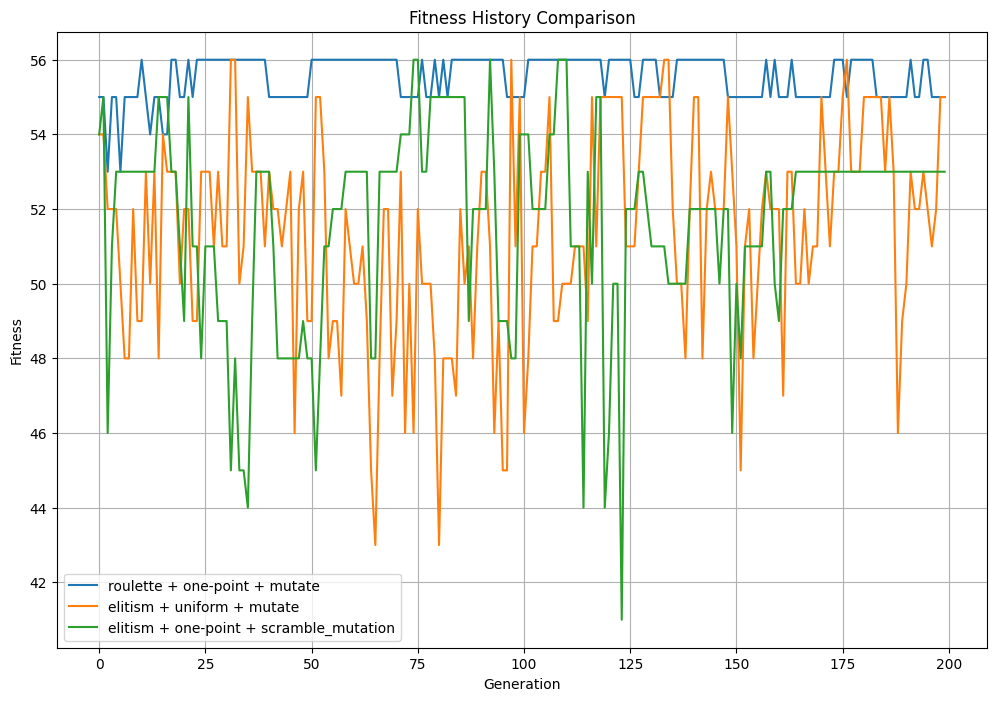

In [85]:
# Vẽ đồ thị Fitness History
plt.figure(figsize=(12, 8))
for i, res in enumerate(results):
    plt.plot(
        np.arange(len(res["Fitness History"])),
        res["Fitness History"],
        label=f"{configs[i][0]} + {configs[i][1]} + {configs[i][2].__name__}",
    )

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness History Comparison")
plt.legend()
plt.grid(True)
plt.show()